    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's.
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import requests, zipfile, StringIO

%matplotlib inline

/opt/rh/anaconda/root/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [60]:
datestring = ['201505', '201507', '201509']
df = pd.DataFrame()
for month in datestring:
    r = requests.get('https://s3.amazonaws.com/tripdata/'+ month + '-citibike-tripdata.zip')
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    df_temp = pd.read_csv(z.open(month +'-citibike-tripdata.csv'))
    df = df.append(df_temp, ignore_index=True)

df.shape

(3337361, 15)

In [63]:
df['date'] = pd.to_datetime(df['starttime'])

In [64]:
df['hour'] = df['date'].dt.hour

In [72]:
df['birth year'].dropna(inplace= True)
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

In [245]:
df['ageM'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [246]:
df['birth year'].dropna(inplace= True)
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,hour,ageM,ageF,ageD,ageN
count,3.337361e+06,3.337361e+06,3.337361e+06,3.337361e+06,3.337361e+06,3.337361e+06,3.337361e+06,3.337361e+06,2.779331e+06,3.337361e+06,3.337361e+06,2.103803e+06,672524.000000,1.899156e+06,0.0
mean,1.009201e+03,5.618801e+02,4.073509e+01,-7.399017e+01,5.590237e+02,4.073481e+01,-7.399027e+01,1.939026e+04,1.976791e+03,1.033412e+00,1.403438e+01,3.964630e+01,37.819431,3.906086e+01,NaN
std,6.718288e+03,6.381679e+02,2.017046e-02,1.372074e-02,6.350335e+02,2.015889e-02,1.374041e-02,2.813963e+03,1.148000e+01,6.070416e-01,4.882139e+00,1.150935e+01,11.160361,1.163144e+01,NaN
min,6.000000e+01,7.200000e+01,4.064677e+01,-7.401713e+01,7.200000e+01,4.064677e+01,-7.401713e+01,1.452900e+04,1.885000e+03,0.000000e+00,0.000000e+00,1.700000e+01,17.000000,1.600000e+01,NaN
25%,4.110000e+02,3.100000e+02,4.072083e+01,-7.400004e+01,3.090000e+02,4.072066e+01,-7.400026e+01,1.696300e+04,NaN,1.000000e+00,1.000000e+01,NaN,NaN,NaN,NaN
50%,6.700000e+02,4.260000e+02,4.073649e+01,-7.399074e+01,4.200000e+02,4.073620e+01,-7.399076e+01,1.933900e+04,NaN,1.000000e+00,1.500000e+01,NaN,NaN,NaN,NaN
75%,1.122000e+03,4.970000e+02,4.075066e+01,-7.398169e+01,4.970000e+02,4.075020e+01,-7.398169e+01,2.202100e+04,NaN,1.000000e+00,1.800000e+01,NaN,NaN,NaN,NaN
max,5.174309e+06,3.232000e+03,4.078721e+01,-7.392989e+01,3.232000e+03,4.078721e+01,-7.392989e+01,2.473600e+04,1.999000e+03,2.000000e+00,2.300000e+01,1.310000e+02,116.000000,1.300000e+02,NaN


In [247]:
df_age = df[['ageM', 'ageF']]

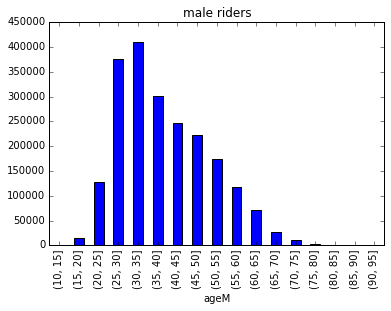

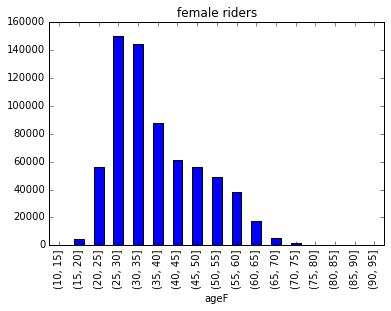

In [248]:
bins = np.arange(10, 99, 5)
df_age.ageM.groupby(pd.cut(df_age.ageM, bins)).agg([np.count_nonzero]).plot(kind='bar', legend=False, title = 'male riders')
df_age.ageF.groupby(pd.cut(df_age.ageF, bins)).agg([np.count_nonzero]).plot(kind='bar', legend=False, title = 'female riders')

## Figure 1: histogrammed distribution of riders' ages by gender

          count_nonzero
ageM                   
(10, 15]   0.000000e+00
(15, 20]   2.595500e-04
(20, 25]   2.206316e-02
(25, 30]   6.660443e-02
(30, 35]   8.591725e-02
(35, 40]   7.301065e-02
(40, 45]   4.702740e-02
(45, 50]   2.501496e-02
(50, 55]   1.523967e-02
(55, 60]   1.633213e-02
(60, 65]   7.647076e-03
(65, 70]   2.741064e-03
(70, 75]   3.750086e-04
(75, 80]   1.507091e-04
(80, 85]   9.269225e-07
(85, 90]   2.377510e-05
(90, 95]   0.000000e+00


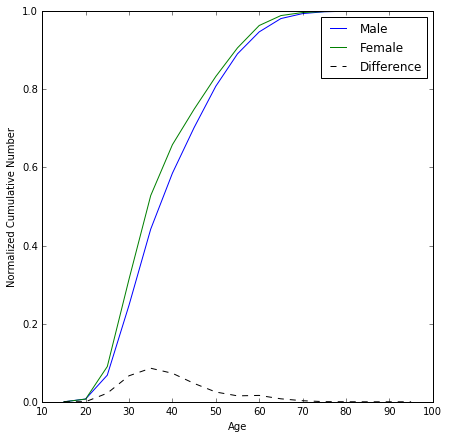

In [249]:
csM=df_age.ageM.groupby(pd.cut(df_age.ageM, bins)).agg([np.count_nonzero]).cumsum()

csF=df_age.ageF.groupby(pd.cut(df_age.ageF, bins)).agg([np.count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

plt.figure(figsize = (7,7))
plt.plot(bins[:-1] + 5, csM / csM.max(), label = "Male")
plt.plot(bins[:-1] + 5, csF / csF.max(), label = "Female")
plt.plot(bins[:-1] + 5, np.sqrt(abs(csF / csF.max() - csM / csM.max()))**2, 'k--',
        label = "Difference")
plt.xlabel("Age")
plt.ylabel("Normalized Cumulative Number")
plt.legend()

## Figure 2: the cumulative distribution of CitiBike riders' ages by gender

# Starting statistical tests

In [250]:
import scipy.stats

##  KS test to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

In [251]:
ks = scipy.stats.ks_2samp(df_age.ageM, df_age.ageF)
print ks

Ks_2sampResult(statistic=0.42886550181415795, pvalue=0.0)


The two sample Kolmogorov-Smirnov test, tests whether two samples come from populations with the __same__ distribution.

It tests the null hypothesis that the two samples are drawn from the same continuous distribution.

When the KS test value is __low__, or the p-value is __high__ (above 0.05 for a=0.05), then we __fail__ to reject the null hypothesis.

Since we obtained a __p-value = 0__, we __reject $H_{0}$__ that samples are drawn from the same continuous distribution


In [252]:
df_sample=pd.DataFrame()
for i in range(1,len(df_age),200):
    foo = df_age.iloc[i,:]
    df_sample = df_sample.append(foo, ignore_index=True)
    
df_sample.shape

(16687, 2)

###  Performing KS test on a subsample of the data (1 ride every 200)

In [254]:
ks_sample = scipy.stats.ks_2samp(df_sample.ageM, df_sample.ageF)
print ks_sample

Ks_2sampResult(statistic=0.42673937795889016, pvalue=0.0)


The KS statistic is 0.4267 and p-value = 0. The result is similar to the one we got for the larger sample, and again we reject the null hypothesis that the two samples are drawn from a population with the same distribution.

## Pearson's  test for correlation

### notice that the Pearson's is a pairwise test: the samples need to be 
* ### a. sorted and 
* ### b. the same size!

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

In [255]:
df_male_clean = df_age.ageM.dropna()
df_female_clean = df_age.ageF.dropna()

In [256]:
df_female_clean = df_female_clean.reset_index(drop=True)
df_male_clean = df_male_clean.reset_index(drop=True)

In [257]:
df_male_clean = df_male_clean.sort_values()
df_female_clean = df_female_clean.sort_values()

In [258]:
print len(df_male_clean)
print len(df_female_clean)

2103803
672524


In [259]:
df_male_clean = np.random.choice(df_male_clean, len(df_female_clean), replace = False)

In [260]:
print len(df_male_clean)

672524


In [261]:
scipy.stats.pearsonr(df_male_clean, df_female_clean)

(0.0021740007081751641, 0.074611743121641746)

Pearson correlation test outputs the __correlation coefficient__ between two samples and the __p-value__ for testing __non-correlation__. The test assumes that the samples compared are normally distributed.

The pearson test for correlation test the __$H_{0}:$ There is no relationship between the observed phenomena.__ Thus, p-values higher than 0.05 fail to reject the null hypothesis and __do not suggest any correlation__ among the samples. Furthermore, Pearson test values range from -1 to 1, with values close to 0 indicating non-significant correlation.

In our case, the __p-value is 0.07>0.05__ and we __fail to reject__ the null hypothesis. Also, the Pearson statistic is very close to zero, indicating __no correlation__ between the two samples.

## Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [262]:
scipy.stats.spearmanr(df_male_clean, df_female_clean)

SpearmanrResult(correlation=0.0017969232249130651, pvalue=0.1405862626581045)

Similarly to Pearson correlation test, Spearman's test calculates a correlation coefficient and a p-value to test for non-correlation. The major difference with the abovementioned Pearon's correlation test, is that Spearman's test __does not__ assume normality in the two samples. The Spearman correlation coefficient ranges from -1 to 1, with 0 indicating no correlation between the samples and tests the sampe hypothesis as above. 

For this two samples, the Spearman correlation coefficient is __almost 0__ and the __p-value=0.14__. So, we __fail to reject__ the null hypothesis that there is __no correlation between the two samples__.

## EXTRA CREDIT:  CHOOSE ONE OF THE TESTS, AND TEST THE CORRELATION OF AGES  OF RIDERS DURING THE DAY VS DURING THE NIGHT!

In [304]:
df_tmp = df[['birth year', 'usertype', 'hour']]
df_tmp.loc[:,'ageN'] = 2016 - df_tmp['birth year'][(df_tmp['usertype'] == 'Subscriber') & (df_tmp['hour'] < 6)  | (df_tmp['hour'] >= 18)]
df_tmp.loc[:,'ageD'] = 2016 - df_tmp['birth year'][(df_tmp['usertype'] == 'Subscriber') & (df_tmp['hour'] >= 6) & (df_tmp['hour'] < 18)]

In [309]:
df_day = df_tmp.ageN.dropna()
df_night = df_tmp.ageD.dropna()

In [310]:
df_day = df_day.reset_index(drop=True)
df_night = df_night.reset_index(drop=True)

In [311]:
df_day = df_day.sort_values()
df_night = df_night.sort_values()

In [313]:
print len(df_day)
print len(df_night)

880175
1899156


In [314]:
df_night = np.random.choice(df_night, len(df_day), replace = False)

In [315]:
print len(df_night)

880175


In [317]:
scipy.stats.pearsonr(df_day, df_night)

(-0.00031580740942334471, 0.76701423310783423)

In this section we try to test whether there is correlation between the ages of riders during the day and during the night. We calculate the __Pearson's correlation coefficient__. The value of the test is __almost zero__ and the __p-value=0.767__, __failing to reject__ the null hypothesis of no correlation between the two samples. 